### Support Vector Machines

This assignment will build off of the previous ungraded assignment. However, here you will use a radial basis function  for your kernel rather than a linear specification. 

To begin, a synthetic data set has been provided below. It is normally distributed with an added offset to create two separate classes.

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.2.0
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



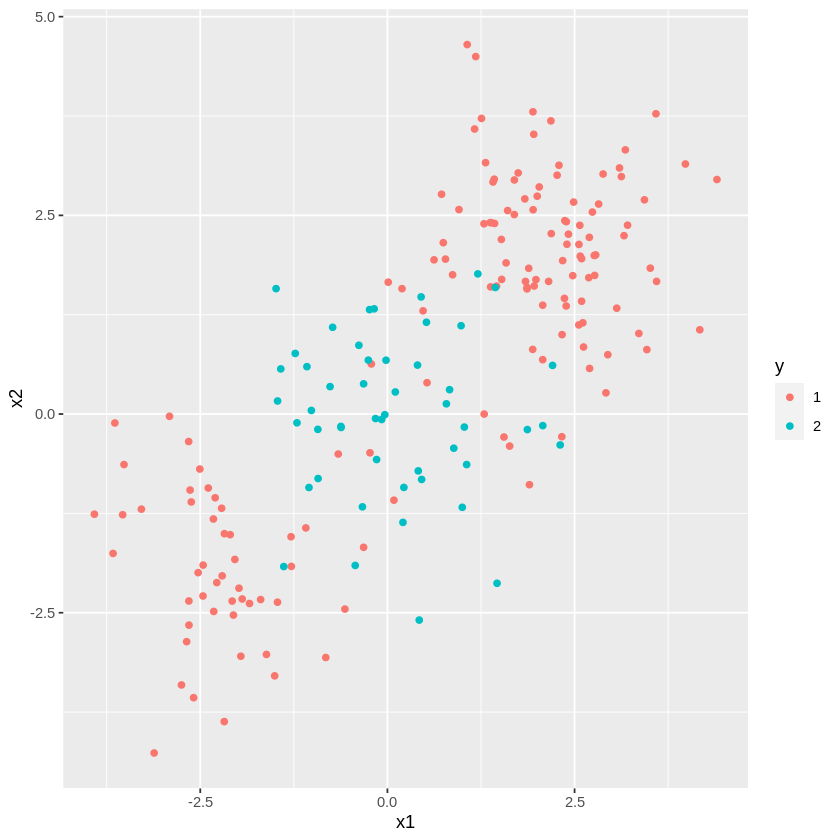

In [1]:
library(tidymodels)
library(ISLR2)

set.seed(1)
sim_data2 <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

sim_data2 %>%
  ggplot(aes(x1, x2, color = y)) +
  geom_point()

Now, you will try an SVM using a radial basis function (RBF). RBF should allow you to capture the non-linearity in the data. To create the specification, you should use `svm_rbf()`. Be sure to pass in classification as the mode and kernlab as the engine. Save your output to `svm_rbf_spec`.

In [2]:
# YOUR CODE HERE

# svm_rbf_spec <- 

# your code here
svm_rbf_spec <- svm_rbf() %>%
  set_mode("classification") %>%
  set_engine("kernlab")


Now fit your model using `fit()`.

In [3]:
# your code here
svm_rbf_fit <- svm_rbf_spec %>% 
  fit(y ~ ., data = sim_data2)

svm_rbf_fit

parsnip model object

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  2.97035866960665 

Number of Support Vectors : 76 

Objective Function Value : -47.1643 
Training error : 0.085 
Probability model included. 

Plot your model. What do you notice? 


Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:scales’:

    alpha




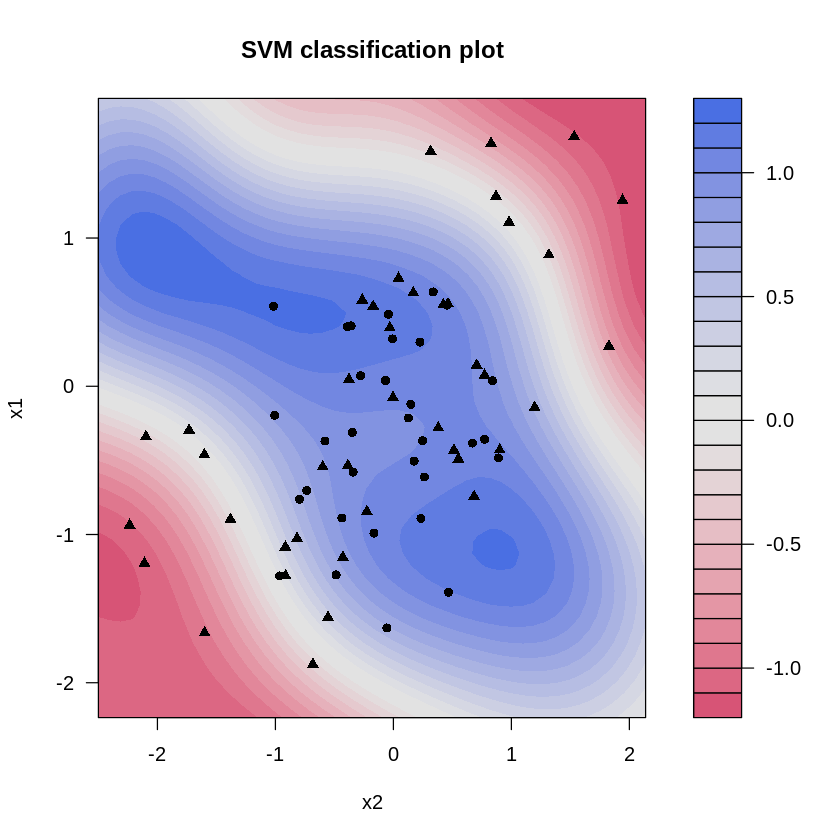

In [4]:
library(kernlab)

# YOUR CODE HERE

# fit_plot <- 

# your code here

fit_plot <- svm_rbf_fit %>%
  extract_fit_engine() %>%
  plot()

Now, let's see how well this model generalizes to new data from the sam generating process. 

In [5]:
set.seed(2)
sim_data2_test <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

In [6]:
augment(svm_rbf_fit, new_data = sim_data2_test) %>%
  conf_mat(truth = y, estimate = .pred_class)

          Truth
Prediction   1   2
         1 137   7
         2  13  43

What do you notice?